In [1]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
    return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
        # Here is where you differentiate the model values with respect to the loss function
        dw, db = t.gradient(current_loss, [model.w, model.b])
        # And here is where you update the model values based on the learning rate chosen
        model.w.assign_sub(learning_rate * dw)
        model.b.assign_sub(learning_rate * db)
        return current_loss

# Define our simple linear regression model
class Model(object):
    def __init__(self):
        # Initialize the weights
        self.w = tf.Variable(INITIAL_W)
        self.b = tf.Variable(INITIAL_B)

    def __call__(self, x):
        return self.w * x + self.b
    

In [7]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0]
LEARNING_RATE=0.19

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
    losses.append(current_loss)
    print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=10.00 b=10.00, loss=489.00000
Epoch  1: w=-3.30 b=2.78, loss=58.49041
Epoch  2: w=1.31 b=3.36, loss=14.38342
Epoch  3: w=0.44 b=1.97, loss=6.83832
Epoch  4: w=1.09 b=1.43, loss=3.96874
Epoch  5: w=1.20 b=0.85, loss=2.38401
Epoch  6: w=1.41 b=0.45, loss=1.43950
Epoch  7: w=1.53 b=0.12, loss=0.86985
Epoch  8: w=1.64 b=-0.12, loss=0.52569
Epoch  9: w=1.72 b=-0.32, loss=0.31770
Epoch 10: w=1.78 b=-0.47, loss=0.19200
Epoch 11: w=1.83 b=-0.59, loss=0.11604
Epoch 12: w=1.87 b=-0.68, loss=0.07013
Epoch 13: w=1.90 b=-0.75, loss=0.04238
Epoch 14: w=1.92 b=-0.81, loss=0.02561
Epoch 15: w=1.94 b=-0.85, loss=0.01548
Epoch 16: w=1.95 b=-0.88, loss=0.00936
Epoch 17: w=1.96 b=-0.91, loss=0.00565
Epoch 18: w=1.97 b=-0.93, loss=0.00342
Epoch 19: w=1.98 b=-0.95, loss=0.00206
Epoch 20: w=1.98 b=-0.96, loss=0.00125
Epoch 21: w=1.99 b=-0.97, loss=0.00075
Epoch 22: w=1.99 b=-0.97, loss=0.00046
Epoch 23: w=1.99 b=-0.98, loss=0.00028
Epoch 24: w=1.99 b=-0.98, loss=0.00017
Epoch 25: w=1.99 b=-0.99, 

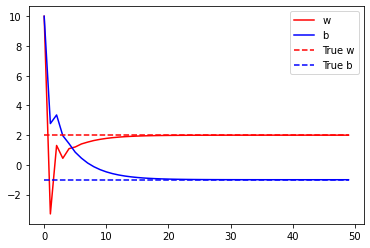

In [8]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()